In [4]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [5]:
quality=ctrl.Antecedent(np.arange(0,11,1),"quality")
service=ctrl.Antecedent(np.arange(0,11,1),"service")
tip=ctrl.Consequent(np.arange(0,26,1),"tip")

In [6]:
quality.automf(3)
service.automf(3)

In [7]:
tip["low"]=fuzzy.trimf(tip.universe,[0,0,13])
tip["medium"]=fuzzy.trimf(tip.universe,[0,13,25])
tip["high"]=fuzzy.trimf(tip.universe,[13,25,25])

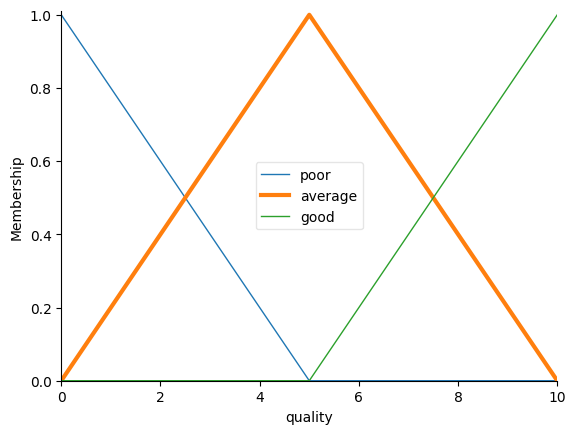

In [8]:
quality['average'].view()

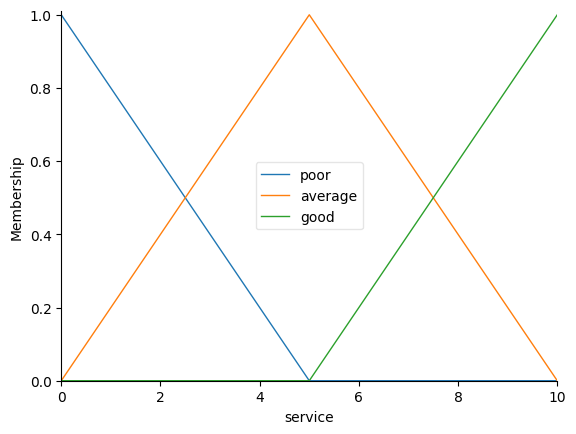

In [9]:
service.view()

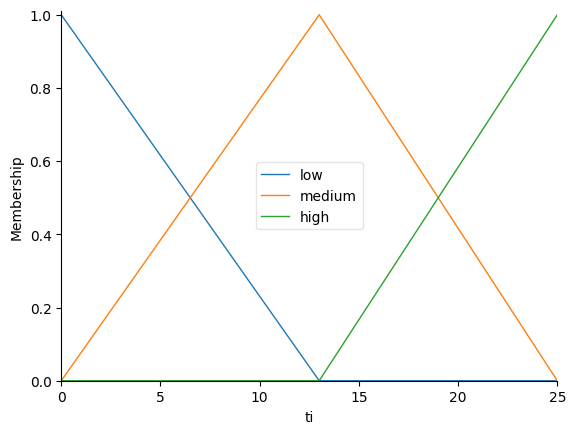

In [10]:
tip.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

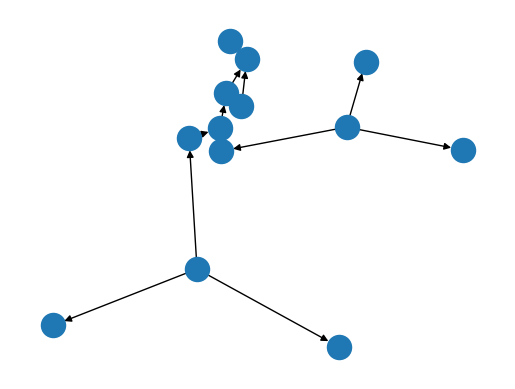

In [24]:
rule1=ctrl.Rule(quality["good"] | service["good"], tip ["high"])
rule1.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

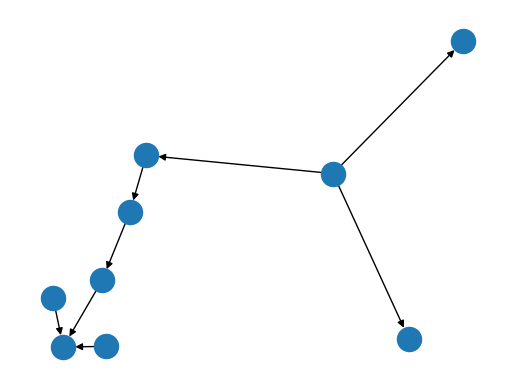

In [26]:
rule2 = ctrl.Rule(service["average"], tip["medium"])
rule2.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

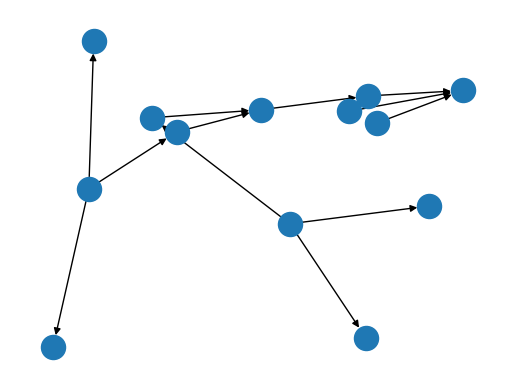

In [27]:
rule3 = ctrl.Rule(quality["poor"] | service["poor"], tip["low"])
rule3.view()

In [28]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3])
tipping =ctrl.ControlSystemSimulation(tipping_ctrl)

In [29]:
tipping.input['quality']=6.5
tipping.input['service']=9.8
tipping.compute()

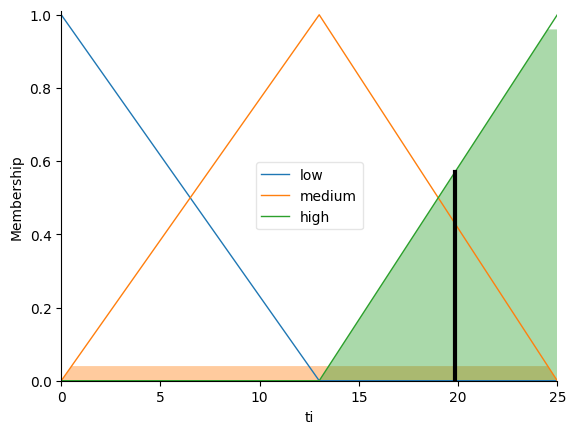

In [31]:
tip.view(sim=tipping)